In [226]:
# =============================================================================
#                                 Table of Contents.
# =============================================================================
# 1. Data Import & Setup.
# 2. Considering Security Implications.
#    - Taking anonimization measures.
# 3. Comparing customer behavior in greographic areas.
# 4. Creating an exclusion flag for low-activity customers.
# 5. Creating a customer profiling variables.
# 6. Creating a combined customer profile label.
# 7. Aggregating Measures
# 8. Comparing customer profiles with regions and departments.
# 9. Exporting data.
# 10. Answering Key Question with Visualizations.
# =============================================================================

In [2]:
##Step 1
## Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
## Importing Data set ords_prods_merge
df = pd.read_pickle(r'/Users/javieraquezada/Desktop/05-2025 Instacart Basket Analysis/02 Data/Prepared Data/final_dataset.pkl')

In [4]:
##Creating Path
path = r'/Users/javieraquezada/Desktop/05-2025 Instacart Basket Analysis'

In [5]:
## Step.2 Considering security implications
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31987181 entries, 0 to 31987180
Data columns (total 34 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int64         
 1   user_id                        int64         
 2   order_number                   int64         
 3   orders_day_of_week             int64         
 4   order_hour_of_day              int64         
 5   days_since_prior_order         float64       
 6   product_id                     int64         
 7   add_to_cart_order              int64         
 8   reordered                      int64         
 9   _merge                         category      
 10  product_name                   object        
 11  aisle_id                       float64       
 12  department_id                  float64       
 13  prices                         float64       
 14  price_range_loc                object        
 15  busiest_day  

In [6]:
## Creating a data frame from taking anonimation measures
df_anonymized = df.copy()

In [7]:
## Droping sensitive columns (PII)
df_anonymized = df_anonymized.drop(columns=['first_name', 'surname','user_id'])

In [8]:
## Checking
df_anonymized.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,...,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,2,8,NaN,196,1,0,both,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


In [9]:
## Step.3 Comparing customer behavior in greographic areas
##Creating a Region Column based on "State"

In [10]:
#Defining regions
##Region 1: Northeast
northeast = [
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
    'New York', 'Pennsylvania', 'New Jersey']

# Region 2: Midwest
midwest = [
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

# Region 3: South
south = [
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
    'North Carolina', 'South Carolina', 'Georgia', 'Florida',
    'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
    'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

# Region 4: West
west = [
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
    'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
## Adding region column

def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

df_anonymized['region'] = df_anonymized['state'].apply(assign_region)

In [12]:
df_anonymized.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,...,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,2,8,NaN,196,1,0,both,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
1,2539329,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
2,2539329,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
3,2539329,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
4,2539329,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South


In [19]:
## Crossing variables
region_spending = pd.crosstab(df_anonymized['region'], df_anonymized['spending_flag'])

In [20]:
## Checking
region_spending.head

<bound method NDFrame.head of spending_flag  High spender  Low spender
region                                  
Midwest               13747      7485660
Northeast              7947      5641587
South                 17542     10634953
West                  13908      8171837>

In [21]:
## South Region has the most amount of high spender customer but also the highest amount of total customer

In [22]:
## Step 4. Creating an exclusion flag for low-activity customers (>5 orders)
## low-activity flag customers
df_anonymized['exclusion_flag'] = df_anonymized['max_order'] < 5

In [23]:
## Checking
df_anonymized['exclusion_flag'].value_counts()

exclusion_flag
False    30566617
True      1420564
Name: count, dtype: int64

In [24]:
df_anonymized[df_anonymized['exclusion_flag'] == True].head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
360,2717275,1,3,12,NaN,15349,1,0,both,Organic Raw Agave Nectar,...,Regular customer,Female,California,75,2018-10-08,0,divorced/widowed,115242,West,True
361,2717275,1,3,12,NaN,21413,2,0,both,Organic Soba,...,Regular customer,Female,California,75,2018-10-08,0,divorced/widowed,115242,West,True
362,2717275,1,3,12,NaN,48775,3,0,both,Organic Red Cabbage,...,Regular customer,Female,California,75,2018-10-08,0,divorced/widowed,115242,West,True
363,2717275,1,3,12,NaN,28289,4,0,both,Organic Shredded Carrots,...,Regular customer,Female,California,75,2018-10-08,0,divorced/widowed,115242,West,True
364,2717275,1,3,12,NaN,8518,5,0,both,Organic Red Onion,...,Regular customer,Female,California,75,2018-10-08,0,divorced/widowed,115242,West,True


In [25]:
## Filtering
##Excluding low-activity users
df_active_anonymized = df_anonymized[df_anonymized['exclusion_flag'] == False]

In [26]:
## cheking
df_active_anonymized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30566617 entries, 0 to 31987180
Data columns (total 33 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int64         
 1   order_number                   int64         
 2   orders_day_of_week             int64         
 3   order_hour_of_day              int64         
 4   days_since_prior_order         float64       
 5   product_id                     int64         
 6   add_to_cart_order              int64         
 7   reordered                      int64         
 8   _merge                         category      
 9   product_name                   object        
 10  aisle_id                       float64       
 11  department_id                  float64       
 12  prices                         float64       
 13  price_range_loc                object        
 14  busiest_day                    object        
 15  busiests_days     

In [27]:
##Step.5  Creating a profiling variable based on 'age','income',certain goods in the 'department_id',' number of dependants'
## 'orders_day_of_week' and 'order_hour_of_day'

In [28]:
## Checking age unique values to determine profiles
sorted(df_active_anonymized['age'].unique())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81]

In [119]:
#Creating a sample of the dataframe
sampled_df = df_active_anonymized.sample(n=100000, random_state=1)

In [30]:
## Defining profiles by dependants
def assign_profile(row):
    if row['n_dependants'] == 0:
        return 'Single Adult'
    else:
        return 'Parent'

In [116]:
## Applying
df_active_anonymized['parenting_status'] = df_active_anonymized.apply(assign_profile, axis=1)

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_950/962950310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active_anonymized['parenting_status'] = df_active_anonymized.apply(assign_profile, axis=1)


In [117]:
##checking output
df_active_anonymized['parenting_status'].value_counts()

parenting_status
Parent          22924390
Single Adult     7642227
Name: count, dtype: int64

In [120]:
sampled_df.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,parenting_status
30587766,2925602,44,6,22,6.0,10749,2,1,both,Organic Red Bell Pepper,...,Female,North Carolina,39,2019-07-14,2,married,52523,South,False,Parent
16692287,795105,41,4,18,8.0,19503,4,1,both,Udon Soup Bowl,...,Male,Tennessee,72,2018-07-30,2,married,92452,South,False,Parent
6003392,601485,2,3,22,14.0,25653,2,0,both,Organic Plain Yogurt,...,Male,Massachusetts,38,2019-06-24,2,married,41366,Northeast,False,Parent
23602803,2604211,11,0,10,14.0,24235,14,0,both,Honey Wheat Enriched Bread,...,Female,Oregon,66,2018-07-01,1,married,75800,West,False,Parent
11158229,1668564,14,1,8,25.0,26604,22,0,both,Organic Blackberries,...,Female,New Mexico,40,2018-03-27,2,married,51965,West,False,Parent


In [124]:
##Defining profiles by age
def assign_age_group(age):
    if age < 18:
        return 'Teen'
    elif 18 <= age <= 29:
        return 'Young Adult'
    elif 30 <= age <= 44:
        return 'Adult'
    elif 45 <= age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'

In [125]:
## applying
sampled_df['age_group'] = sampled_df['age'].apply(assign_age_group)

In [126]:
## Checking output
sampled_df['age_group'].value_counts()

age_group
Senior         34126
Middle Aged    23555
Adult          23542
Young Adult    18777
Name: count, dtype: int64

In [127]:
## Checking income unique values to determine profiles
sorted(sampled_df['income'].unique())

[25955,
 26006,
 26116,
 26141,
 26197,
 26234,
 26293,
 26296,
 26304,
 26348,
 26407,
 26439,
 26580,
 26587,
 26598,
 26621,
 26657,
 26671,
 26672,
 26714,
 26761,
 26805,
 26833,
 26895,
 26972,
 27044,
 27092,
 27110,
 27133,
 27145,
 27152,
 27210,
 27235,
 27301,
 27320,
 27328,
 27334,
 27340,
 27361,
 27363,
 27369,
 27372,
 27380,
 27386,
 27402,
 27415,
 27423,
 27449,
 27451,
 27457,
 27472,
 27479,
 27493,
 27501,
 27505,
 27507,
 27511,
 27514,
 27528,
 27544,
 27551,
 27552,
 27556,
 27557,
 27558,
 27567,
 27572,
 27577,
 27582,
 27584,
 27609,
 27612,
 27625,
 27633,
 27634,
 27635,
 27646,
 27648,
 27650,
 27653,
 27678,
 27695,
 27696,
 27701,
 27732,
 27744,
 27747,
 27748,
 27749,
 27759,
 27769,
 27798,
 27807,
 27811,
 27837,
 27839,
 27840,
 27844,
 27845,
 27851,
 27854,
 27855,
 27865,
 27877,
 27878,
 27888,
 27898,
 27906,
 27909,
 27930,
 27938,
 27942,
 27946,
 27949,
 27952,
 27954,
 27966,
 27967,
 27973,
 27982,
 27983,
 27993,
 28003,
 28011,
 28022,


In [128]:
print("Minimum income:", sampled_df['income'].min())
print("Maximum income:", sampled_df['income'].max())

Minimum income: 25955
Maximum income: 593901


In [134]:
##defining profiles
def assign_income_group(income):
    if income < 50000:
        return 'Low-Income'
    elif 50000 <= income < 100000:
        return 'Midle-Income'
    elif 100000 <= income < 150000:
        return 'Upper_Income'
    elif 150000 <= income < 250000:
        return 'High-Income'
    else:
        return 'Very High-Income'

In [135]:
## applying
sampled_df['income_group'] = sampled_df['income'].apply(assign_income_group)

In [136]:
## checking output
sampled_df['income_group'].value_counts()

income_group
Midle-Income        43282
Upper_Income        33113
High-Income         12008
Low-Income          11038
Very High-Income      559
Name: count, dtype: int64

In [137]:
## Creating visualizations for region, age groups, income,and parenting

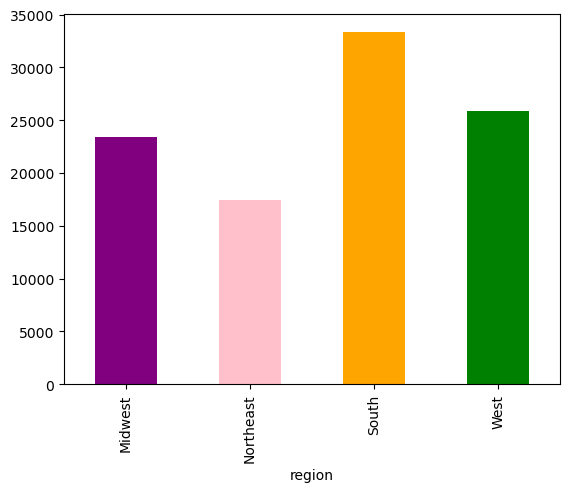

In [138]:
##Creating Bar Chart for region
bar_region = sampled_df['region'].value_counts().sort_index().plot.bar(color=['purple','pink','orange','green'])

In [84]:
## Exporting the chart outside of Jupyter in the form of an image file.
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_950/2560072309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profile_distribution, x='Profile', y='Count', palette='Set3')


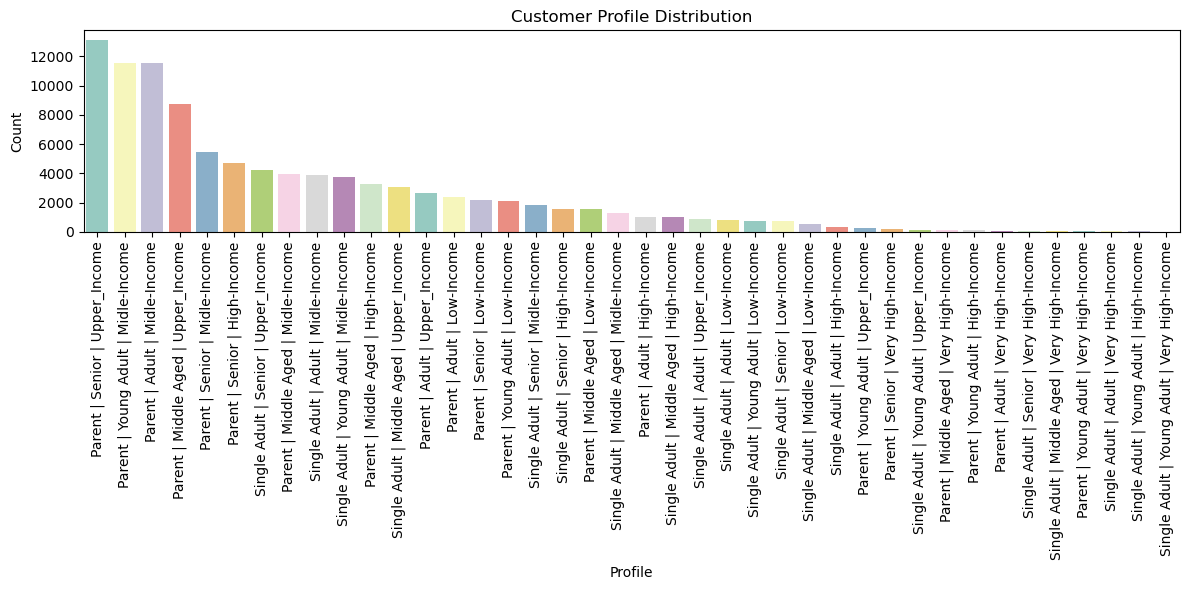

In [140]:
## Step6.Creating a combined profile label
sampled_df['combined_profile'] = sampled_df['parenting_status'] + ' | ' + sampled_df['age_group'] + ' | ' + sampled_df['income_group']

## Counting occurrences
profile_distribution = sampled_df['combined_profile'].value_counts().reset_index()
profile_distribution.columns = ['Profile', 'Count']
## Creatin bar chart
customer_profile_distribution = plt.figure(figsize=(12,6))
sns.barplot(data=profile_distribution, x='Profile', y='Count', palette='Set3')
plt.xticks(rotation=90)
plt.title('Customer Profile Distribution')
plt.tight_layout()
plt.show()

In [141]:
## Exporting the chart outside of Jupyter in the form of an image file.
customer_profile_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

<Axes: xlabel='age', ylabel='income'>

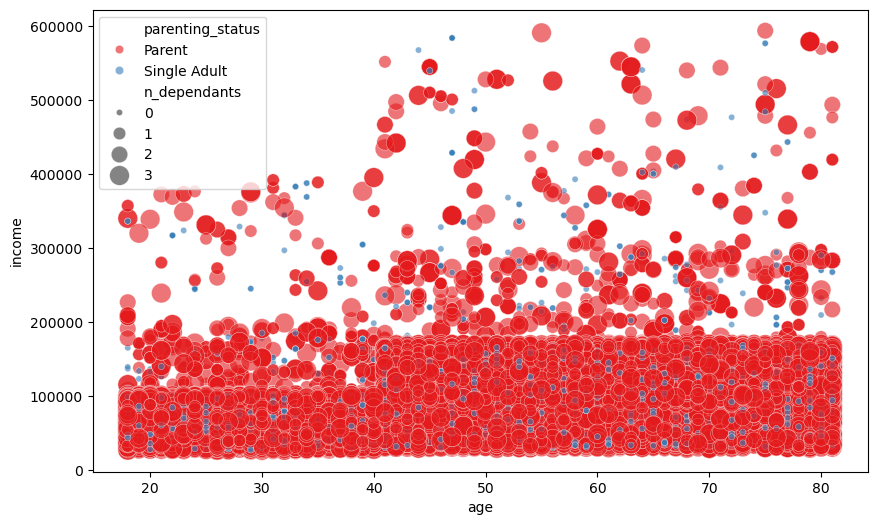

In [144]:
# Scatterplot including age, income, and parenting status
sct_parenting_age_income = plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df,
                x='age',
                y='income', 
                hue='parenting_status',
                size='n_dependants',
                sizes=(20, 200),
                alpha=0.6, 
                palette='Set1')

In [145]:
## Exporting the chart outside of Jupyter in the form of an image file.
sct_parenting_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sct_parenting_age_income.png'))

In [65]:
## Creating Viz for orders by day

In [66]:
##assingnaition of names to numbers
day_name_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'}

In [78]:
## Change of data type for conversion
orders_by_day['orders_day_of_week'] = orders_by_day['orders_day_of_week'].astype(int)

In [79]:
##Replacing
orders_by_day['orders_day_of_week'] = orders_by_day['orders_day_of_week'].replace(day_name_map)

In [80]:
## Checking
print(orders_by_day.head())

  orders_day_of_week  order_id
0             Sunday     18964
1             Monday     17461
2            Tuesday     12931
3          Wednesday     12034
4           Thursday     11673


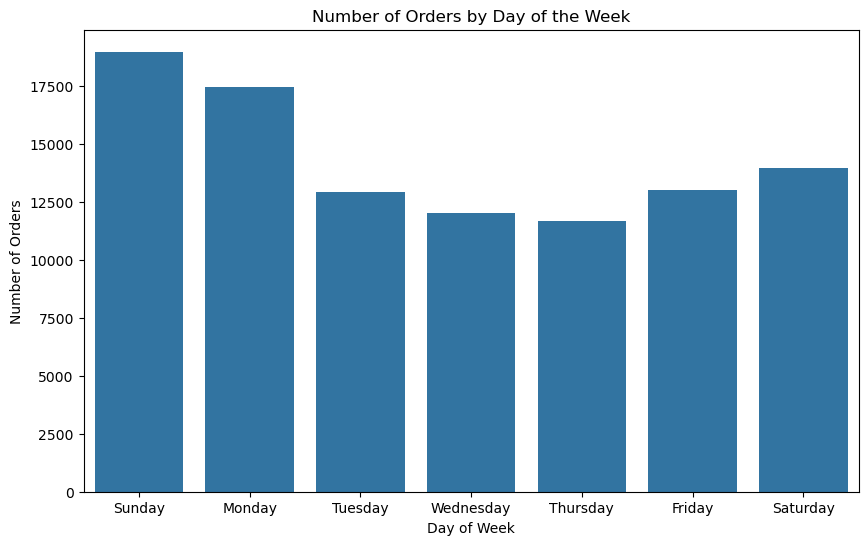

In [82]:
## Creating Bar Chart
bar_orders_of_week = plt.figure(figsize=(10,6))
sns.barplot(data=orders_by_day, x='orders_day_of_week', y='order_id', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

In [83]:
## Exporting the chart outside of Jupyter in the form of an image file.
bar_orders_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_of_week.png'))

In [85]:
## Creating viz for price range frecuency
df['price_range_loc'].value_counts()

price_range_loc
Mid-range product    21860860
Low-range product    10126321
Name: count, dtype: int64

In [94]:
# Normalizing the value counts to get proportions
price_range_freq = sampled_df['price_range_loc'].value_counts(normalize=True).reset_index()
price_range_freq.columns = ['price_range', 'frequency']

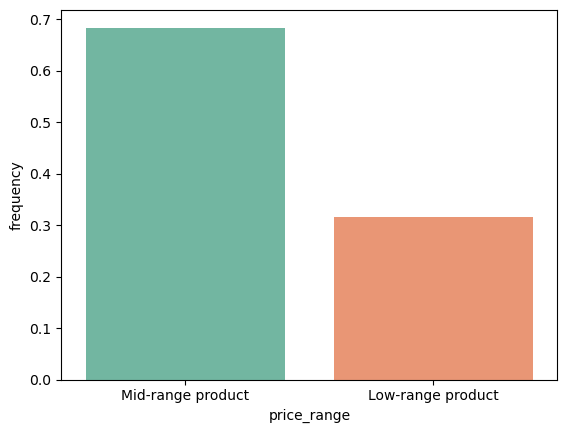

In [96]:
## Creating the bar
frecuency_price_range_tag = sns.barplot(data=price_range_freq,x='price_range', y='frequency',hue='price_range',palette='Set2',legend=False)

In [97]:
## Exporting the chart outside of Jupyter in the form of an image file.
frecuency_price_range_tag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frecuency_price_range.png'))

In [153]:
## Step 7 aggregating the max,and mean.
agg_stats = sampled_df.groupby('combined_profile').agg({
    'age_group': ['max', 'min'],
    'income_group': ['max', 'min'],
    'n_dependants': ['max','min'] }).reset_index()
     

In [154]:
agg_stats

combined_profile    age_group               \
                                                           max          min   
0                    Parent | Adult | High-Income        Adult        Adult   
1                     Parent | Adult | Low-Income        Adult        Adult   
2                   Parent | Adult | Midle-Income        Adult        Adult   
3                   Parent | Adult | Upper_Income        Adult        Adult   
4               Parent | Adult | Very High-Income        Adult        Adult   
5              Parent | Middle Aged | High-Income  Middle Aged  Middle Aged   
6               Parent | Middle Aged | Low-Income  Middle Aged  Middle Aged   
7             Parent | Middle Aged | Midle-Income  Middle Aged  Middle Aged   
8             Parent | Middle Aged | Upper_Income  Middle Aged  Middle Aged   
9         Parent | Middle Aged | Very High-Income  Middle Aged  Middle Aged   
10                  Parent | Senior | High-Income       Senior       Senior   
11                   Parent | Senior | Low-Income       Senior       Senior   
12                 Parent | Senior | Midle-Income       Senior       Senior   
13                 Parent | Senior | Upper_Income       Senior       Senior   
14             Parent | Senior | Very High-Income       Senior       Senior   
15             Parent | Young Adult | High-Income  Young Adult  Young Adult   
16              Parent | Young Adult | Low-Income  Young Adult  Young Adult   
17            Parent | Young Adult | Midle-Income  Young Adult  Young Adult   
18            Parent | Young Adult | Upper_Income  Young Adult  Young Adult   
19        Parent | Young Adult | Very High-Income  Young Adult  Young Adult   
20             Single Adult | Adult | High-Income        Adult        Adult   
21              Single Adult | Adult | Low-Income        Adult        Adult   
22            Single Adult | Adult | Midle-Income        Adult        Adult   
23            Single Adult | Adult | Upper_Income        Adult        Adult   
24        Single Adult | Adult | Very High-Income        Adult        Adult   
25       Single Adult | Middle Aged | High-Income  Middle Aged  Middle Aged   
26        Single Adult | Middle Aged | Low-Income  Middle Aged  Middle Aged   
27      Single Adult | Middle Aged | Midle-Income  Middle Aged  Middle Aged   
28      Single Adult | Middle Aged | Upper_Income  Middle Aged  Middle Aged   
29  Single Adult | Middle Aged | Very High-Income  Middle Aged  Middle Aged   
30            Single Adult | Senior | High-Income       Senior       Senior   
31             Single Adult | Senior | Low-Income       Senior       Senior   
32           Single Adult | Senior | Midle-Income       Senior       Senior   
33           Single Adult | Senior | Upper_Income       Senior       Senior   
34       Single Adult | Senior | Very High-Income       Senior       Senior   
35       Single Adult | Young Adult | High-Income  Young Adult  Young Adult   
36        Single Adult | Young Adult | Low-Income  Young Adult  Young Adult   
37      Single Adult | Young Adult | Midle-Income  Young Adult  Young Adult   
38      Single Adult | Young Adult | Upper_Income  Young Adult  Young Adult   
39  Single Adult | Young Adult | Very High-Income  Young Adult  Young Adult   

        income_group                   n_dependants      
                 max               min          max min  
0        High-Income       High-Income            3   1  
1         Low-Income        Low-Income            3   1  
2       Midle-Income      Midle-Income            3   1  
3       Upper_Income      Upper_Income            3   1  
4   Very High-Income  Very High-Income            3   1  
5        High-Income       High-Income            3   1  
6         Low-Income        Low-Income            3   1  
7       Midle-Income      Midle-Income            3   1  
8       Upper_Income      Upper_Income            3   1  
9   Very High-Income  Very High-Income            3   1  
10       High-Inco

In [101]:
## Step 8.
##Comparing customer profiles with regions and departments.

In [163]:
# Creating Department dictionary
department_dict = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

In [166]:
sampled_df['department_name'] = sampled_df['department_id'].replace(department_dict)

In [167]:
sampled_df.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,...,n_dependants,fam_status,income,region,exclusion_flag,parenting_status,age_group,income_group,combined_profile,department_name
30587766,2925602,44,6,22,6.0,10749,2,1,both,Organic Red Bell Pepper,...,2,married,52523,South,False,Parent,Adult,Midle-Income,Parent | Adult | Midle-Income,produce
16692287,795105,41,4,18,8.0,19503,4,1,both,Udon Soup Bowl,...,2,married,92452,South,False,Parent,Senior,Midle-Income,Parent | Senior | Midle-Income,international
6003392,601485,2,3,22,14.0,25653,2,0,both,Organic Plain Yogurt,...,2,married,41366,Northeast,False,Parent,Adult,Low-Income,Parent | Adult | Low-Income,dairy eggs
23602803,2604211,11,0,10,14.0,24235,14,0,both,Honey Wheat Enriched Bread,...,1,married,75800,West,False,Parent,Senior,Midle-Income,Parent | Senior | Midle-Income,bakery
11158229,1668564,14,1,8,25.0,26604,22,0,both,Organic Blackberries,...,2,married,51965,West,False,Parent,Adult,Midle-Income,Parent | Adult | Midle-Income,produce


In [168]:
## grouping
profile_region_dept = sampled_df.groupby(['age_group', 'region', 'department_name']).size().reset_index(name='order_count')

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_950/2840924692.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


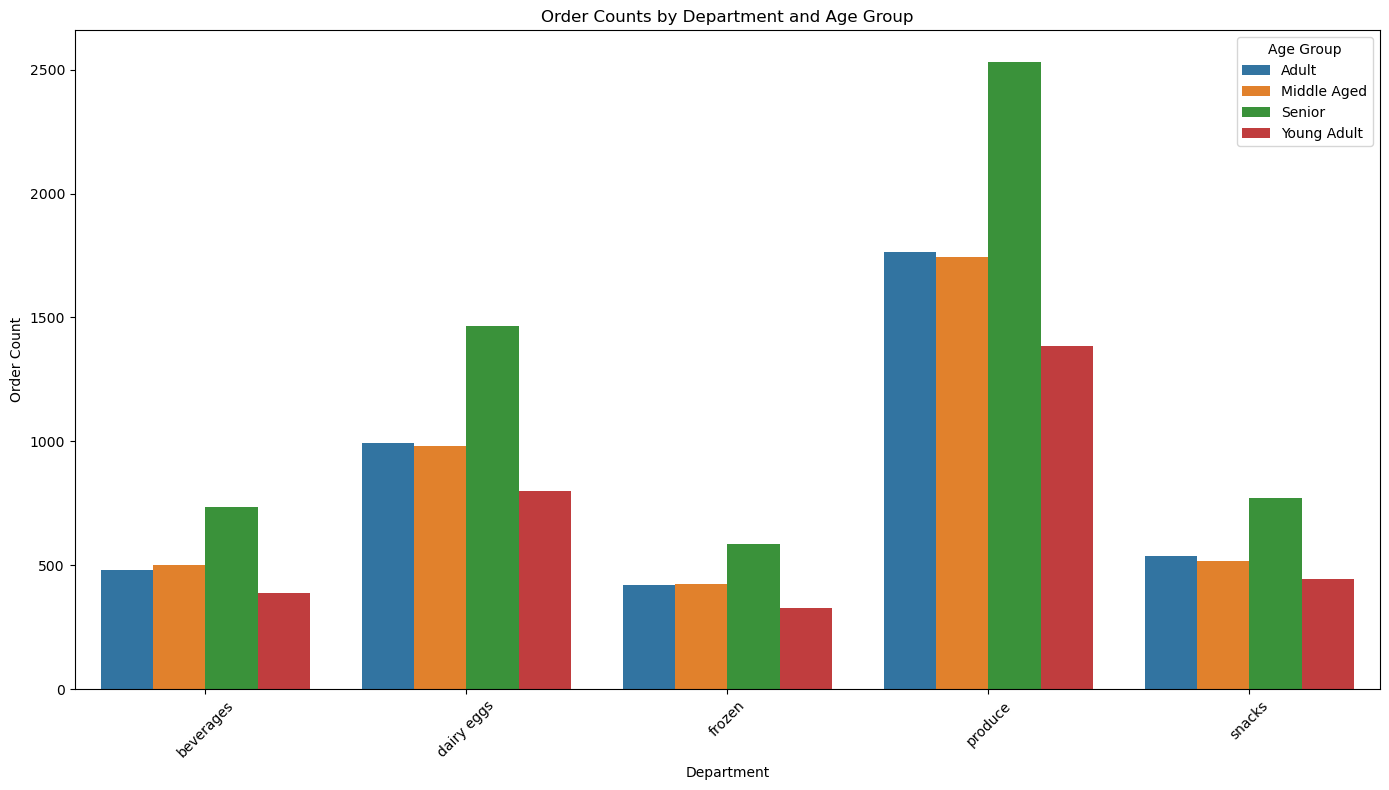

In [170]:
## Creating top departments for comparison.
top_departments = profile_region_dept.groupby('department_name')['order_count'].sum().sort_values(ascending=False).head(5).index
filtered_df = profile_region_dept[profile_region_dept['department_name'].isin(top_departments)]

order_counts_dep_age= plt.figure(figsize=(14,8))
sns.barplot(
    data=filtered_df,
    x='department_name',
    y='order_count',
    hue='age_group',
    ci=None
)
plt.title('Order Counts by Department and Age Group')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [176]:
## Exporting the chart outside of Jupyter in the form of an image file.
order_counts_dep_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_counts_dep_age.png'))

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_950/2916909341.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


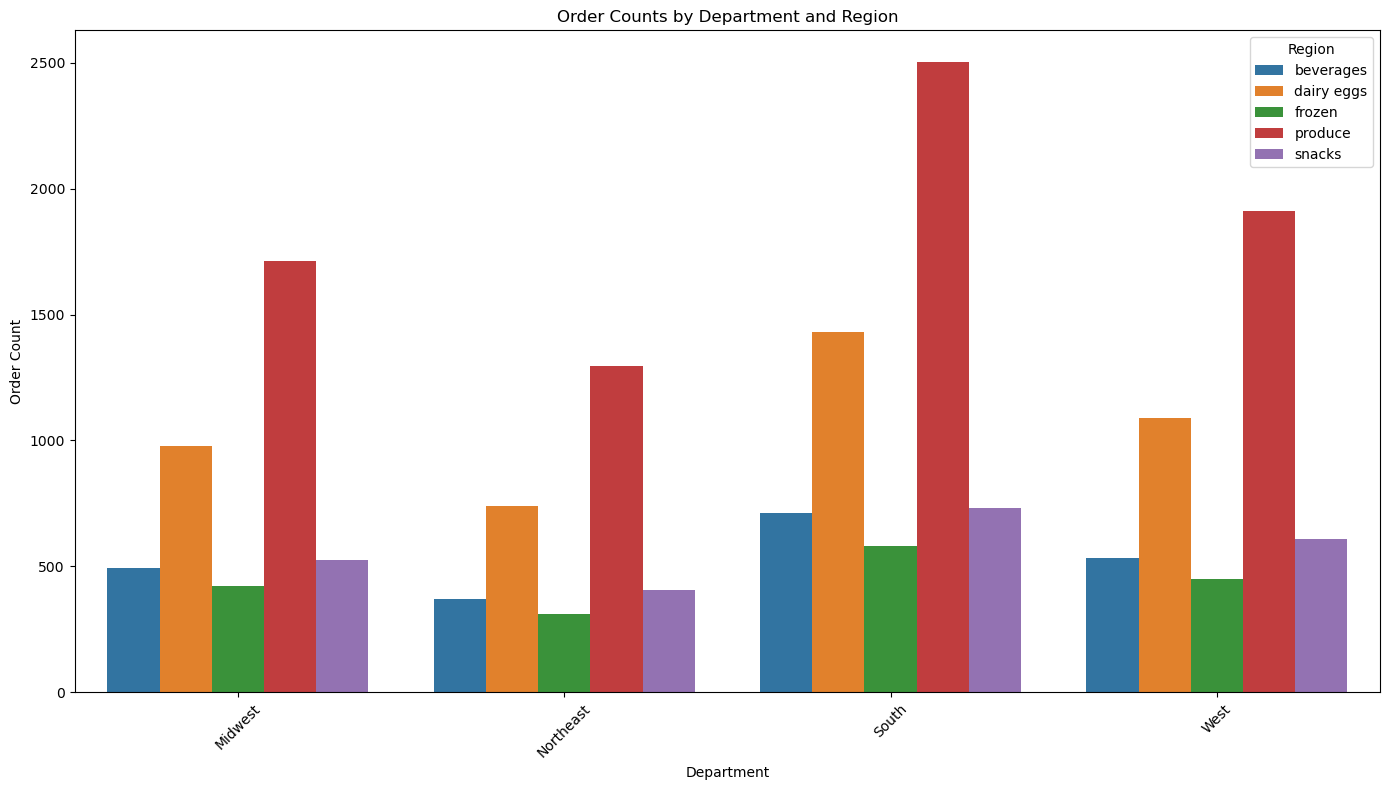

In [172]:
# Filter top departments to keep the plot clean 
top_departments = profile_region_dept.groupby('department_name')['order_count'].sum().sort_values(ascending=False).head(5).index
filtered_df = profile_region_dept[profile_region_dept['department_name'].isin(top_departments)]

department_region= plt.figure(figsize=(14,8))
sns.barplot(
    data=filtered_df,
    x='region',
    y='order_count',
    hue='department_name',
    ci=None
)
plt.title('Order Counts by Department and Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
## Exporting the chart outside of Jupyter in the form of an image file.
department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region.png'))

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_950/2128362797.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


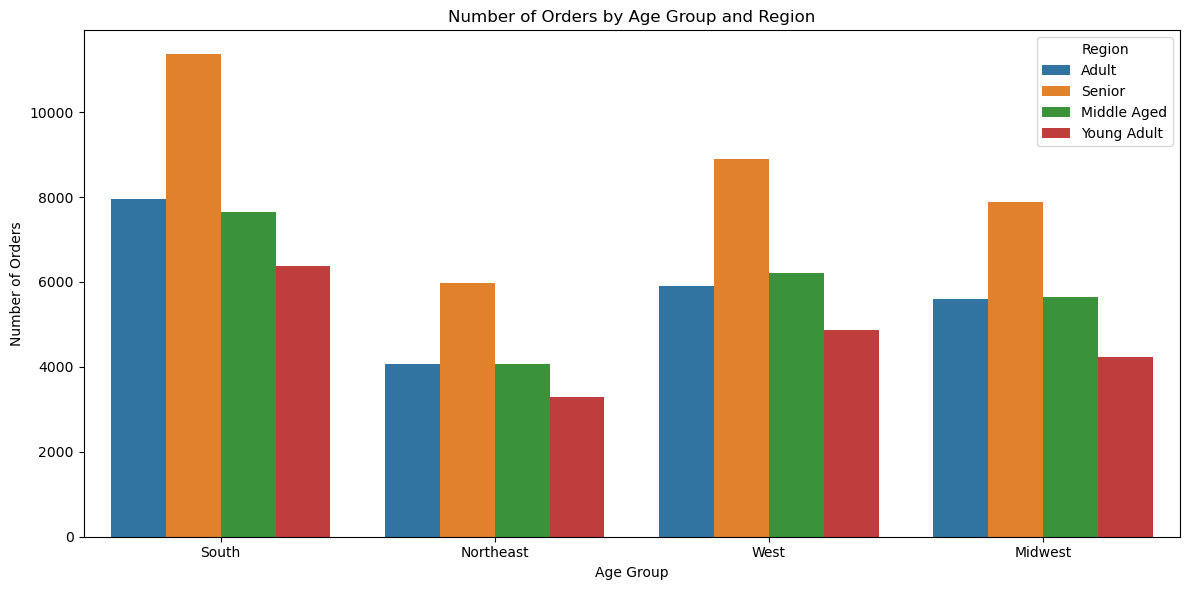

In [177]:
age_region= plt.figure(figsize=(12,6))
sns.barplot(
    data=sampled_df,
    x='region',
    y='order_id',  # or 'order_count' if you have pre-aggregated counts
    hue='age_group',
    estimator=len,  # counts the number of orders per group
    ci=None
)
plt.title('Number of Orders by Age Group and Region')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [178]:
## Exporting the chart outside of Jupyter in the form of an image file.
age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'))

In [179]:
## Exporting DataFrame
df_active_anonymized.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dataset_anonymized_final.pkl'))

In [203]:
## Answering Key Questions about order habits and customer profiles

In [180]:
## Consinstency Checks
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 30587766 to 19491316
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100000 non-null  int64         
 1   order_number                   100000 non-null  int64         
 2   orders_day_of_week             100000 non-null  int64         
 3   order_hour_of_day              100000 non-null  int64         
 4   days_since_prior_order         94590 non-null   float64       
 5   product_id                     100000 non-null  int64         
 6   add_to_cart_order              100000 non-null  int64         
 7   reordered                      100000 non-null  int64         
 8   _merge                         100000 non-null  category      
 9   product_name                   100000 non-null  object        
 10  aisle_id                       100000 non-null  float64       
 

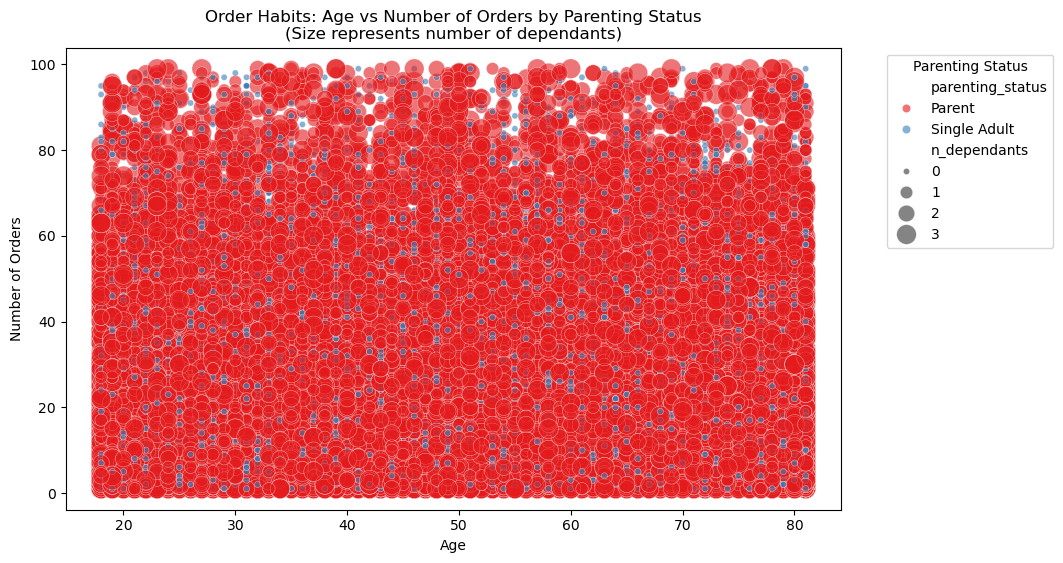

In [223]:
##Answering about profiles and order habits
plt.figure(figsize=(10, 6))

order_habits=sns.scatterplot(
    data=sampled_df,
    x='age',
    y='order_number',             
    hue='parenting_status',        
    size='n_dependants',           
    sizes=(20, 200),
    alpha=0.6,
    palette='Set1'
)

plt.title('Order Habits: Age vs Number of Orders by Parenting Status\n(Size represents number of dependants)')
plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.legend(title='Parenting Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [200]:
## Exporting the chart outside of Jupyter in the form of an image file.
order_habits.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_habits.png'))

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


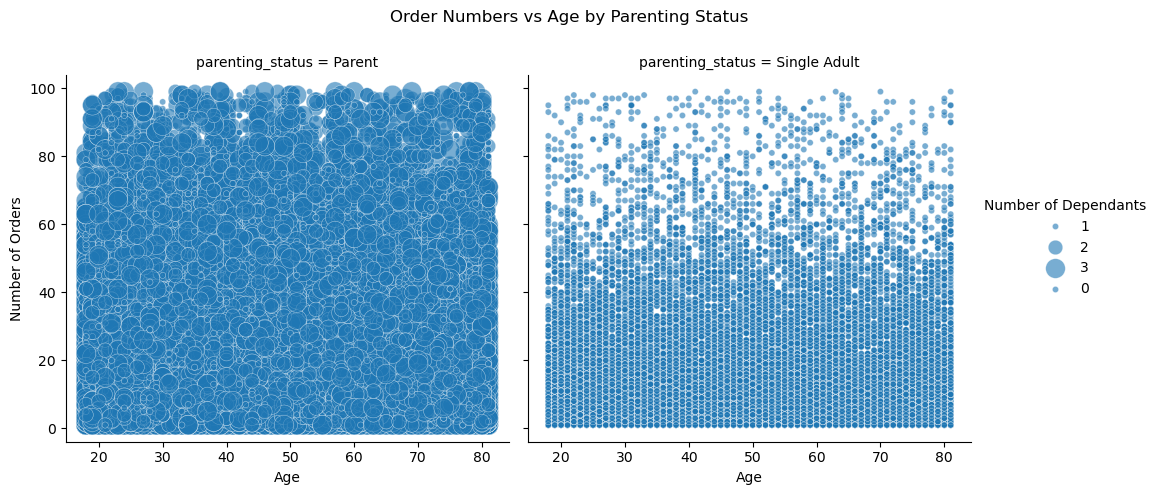

In [198]:
g = sns.FacetGrid(sampled_df, col="parenting_status", height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x="age", y="order_number", alpha=0.6, size="n_dependants", sizes=(20, 200), palette='Set1')
g.set_axis_labels("Age", "Number of Orders")
g.add_legend(title="Number of Dependants")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Order Numbers vs Age by Parenting Status')
plt.show()

In [201]:
## Exporting the chart outside of Jupyter in the form of an image file.
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'g.png'))

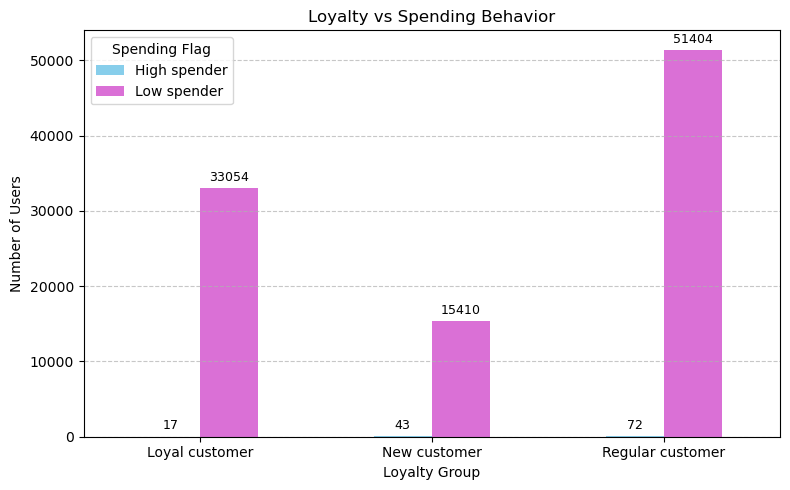

In [215]:
##Answering about loyalty customer spending 

# Crosstab of loyalty and spending
loyalty_spending_ct = pd.crosstab(sampled_df['loyalty_flag'], sampled_df['spending_flag'])

# Plot
ax = loyalty_spending_ct.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orchid', 'gold'])

loyalty_spendings= plt.title('Loyalty vs Spending Behavior')
plt.xlabel('Loyalty Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Spending Flag')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

In [216]:
## Exporting the chart outside of Jupyter in the form of an image file.
loyalty_spendings.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending.png'))

In [219]:
# Count number of orders per department
dept_counts = sampled_df['department_name'].value_counts().sort_values(ascending=False)

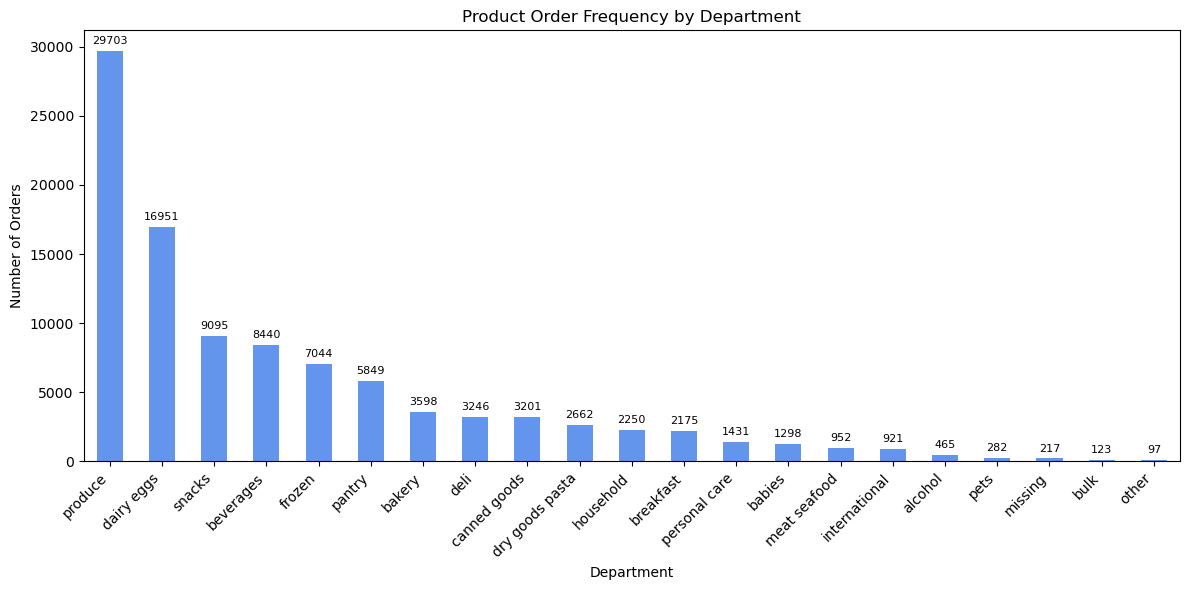

In [221]:
# answering about product popularity

product_popularity= plt.figure(figsize=(12, 6))
dept_counts.plot(kind='bar', color='cornflowerblue')

plt.title('Product Order Frequency by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, value in enumerate(dept_counts.values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [222]:
## Exporting the chart outside of Jupyter in the form of an image file.
product_popularity.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_popularity.png'))